<a href="https://colab.research.google.com/github/hide-squid/high-school-project-1/blob/main/%EA%B3%B5%EB%8F%99%EA%B5%90%EC%9C%A1%EA%B3%BC%EC%A0%95(%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **키와 발 크기의 상관관계**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

height = [155.3, 157.5, 156.5, 163.9, 169.3, 170.5, 195.5, 175.1, 173.8, 177.7, 182.6, 180.7, 186.7, 189.9, 189.2]
foot = [220, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 300]
print(len(height), len(foot)) #15 ,15

15 15


[220, 230, 235, 240, 245, 250, 260, 265, 270, 275, 280, 285, 290, 300]


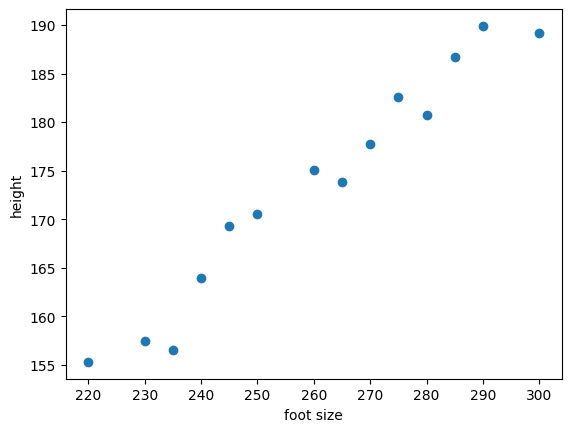

In [ ]:
foot = foot[0:6] + foot[7:15]  # foot의 0번째 부터 6번째까지 + 7번째 부터 15번째까지
print(foot)
height = height[0:6] + height[7:15] # height의 0번째 부터 6번째까지 + 7번째 부터 15번째까지
plt.scatter(foot,height) # 산점도 그리기 (점 찍기)
plt.xlabel('foot size') # X축에 표시
plt.ylabel('height') # Y축에 표시
plt.show() #그래프 보여주기

In [ ]:
x = np.array(foot) # X축을 배열에 저장
y = np.array(height) # Y축을 배열에 저장

a=np.sum((y-np.mean(y))*(x-np.mean(x)))
a=a/np.sum((x-np.mean(x))**2)
b = np.mean(y) - a*np.mean(x)

print(a)
print(b)

0.4780531791907514
49.01401156069366


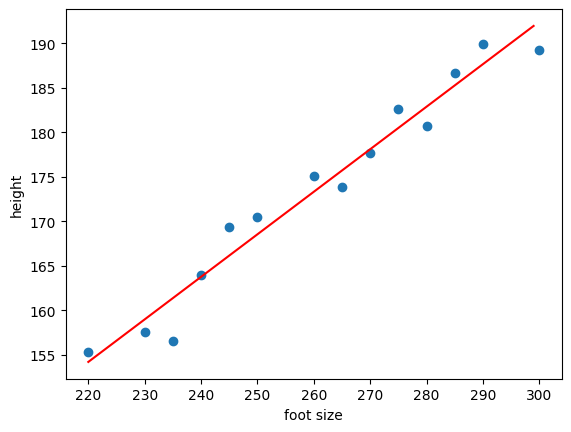

In [ ]:
line_x = np.arange(min(x), max(x), 1)
line_y = a*line_x + b

plt.plot(line_x, line_y, color = 'r')
plt.scatter(x, y)
plt.xlabel('foot size')
plt.ylabel('height')
plt.show()

In [ ]:
use_foot_size = int(input('당신의 발사이즈를 입력하시오: '))
use_height = a * use_foot_size + b
print('당신의 예상되는 키는 %.1f입니다.' %use_height)

# **전복 순살 무게 예측**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

seed = 0
np.random.seed(seed) #처음 실행만 랜덤, 그 이후는 고정된 값 사용

In [ ]:
df = pd.read_csv('abalone.csv')
df

,길이,직경,두께,전체무게,내장무게,껍질무게,나이테,순살무게
0,0.455,0.365,0.095,0.5140,0.1010,0.1500,15,0.2245
1,0.350,0.265,0.090,0.2255,0.0485,0.0700,7,0.0995
2,0.530,0.420,0.135,0.6770,0.1415,0.2100,9,0.2565
3,0.440,0.365,0.125,0.5160,0.1140,0.1550,10,0.2155
4,0.330,0.255,0.080,0.2050,0.0395,0.0550,7,0.0895
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.2390,0.2490,11,0.3700
4173,0.590,0.440,0.135,0.9660,0.2145,0.2605,10,0.4390
4174,0.600,0.475,0.205,1.1760,0.2875,0.3080,9,0.5255
4175,0.625,0.485,0.150,1.0945,0.2610,0.2960,10,0.5310


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   길이      4177 non-null   float64
 1   직경      4177 non-null   float64
 2   두께      4177 non-null   float64
 3   전체무게    4177 non-null   float64
 4   내장무게    4177 non-null   float64
 5   껍질무게    4177 non-null   float64
 6   나이테     4177 non-null   int64  
 7   순살무게    4177 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 261.2 KB
None


In [ ]:
print(df.head()) #상위 5개만

      길이     직경     두께    전체무게    내장무게   껍질무게  나이테    순살무게
0  0.455  0.365  0.095  0.5140  0.1010  0.150   15  0.2245
1  0.350  0.265  0.090  0.2255  0.0485  0.070    7  0.0995
2  0.530  0.420  0.135  0.6770  0.1415  0.210    9  0.2565
3  0.440  0.365  0.125  0.5160  0.1140  0.155   10  0.2155
4  0.330  0.255  0.080  0.2050  0.0395  0.055    7  0.0895


In [ ]:
dataset = df.values
X = dataset[0:4177, 0:7]
Y = dataset[:,7] #7번만

[[ 0.455   0.365   0.095  ...  0.101   0.15   15.    ]
 [ 0.35    0.265   0.09   ...  0.0485  0.07    7.    ]
 [ 0.53    0.42    0.135  ...  0.1415  0.21    9.    ]
 ...
 [ 0.6     0.475   0.205  ...  0.2875  0.308   9.    ]
 [ 0.625   0.485   0.15   ...  0.261   0.296  10.    ]
 [ 0.71    0.555   0.195  ...  0.3765  0.495  12.    ]]

[0.2245 0.0995 0.2565 ... 0.5255 0.531  0.9455]


In [ ]:
#훈련데이터와 테스트 데이터로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = seed)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape, Y_test.shape

((2923, 7), (1254, 7), (2923,), (1254,), (1254,))

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(fit_intercept=True)

In [ ]:
#모델 확
model = lin_reg.fit(X_train, Y_train)

In [ ]:
#정확도 확인
print(model.score(X_train, Y_train))

0.9683422099452302


In [ ]:
#가중치와 편향확
w = model.coef_
b = model.intercept_

print(w)
print(b)

[ 0.13216544  0.07453926  0.03037804  0.69165655 -0.41884668 -0.68525444
 -0.00646454]
-0.014075705572578923


In [ ]:
Y_prediction = model.predict(X_test).flatten()
for i in range(10):
  label = Y_test[i]
  prediction = Y_prediction[i]
  print('실제 살무게: {:.3f}, 학습 후 예측 살무게: {:.3f}'.format(label, prediction))

실제 살무게: 0.278, 학습 후 예측 살무게: 0.314
실제 살무게: 0.261, 학습 후 예측 살무게: 0.267
실제 살무게: 0.527, 학습 후 예측 살무게: 0.531
실제 살무게: 0.021, 학습 후 예측 살무게: 0.016
실제 살무게: 0.673, 학습 후 예측 살무게: 0.665
실제 살무게: 0.478, 학습 후 예측 살무게: 0.492
실제 살무게: 0.267, 학습 후 예측 살무게: 0.257
실제 살무게: 0.250, 학습 후 예측 살무게: 0.290
실제 살무게: 0.127, 학습 후 예측 살무게: 0.140
실제 살무게: 0.461, 학습 후 예측 살무게: 0.508


In [ ]:
#딥러닝으로 발전(케라스, 텐서플로)
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

tf.random.set_seed(3)

In [ ]:
model = Sequential()   #딥러닝 모델 층 생성
#add()는 몇 층 설정, 입력층, 은닉층, 출력층
#입력층 input_dim은 속성의 개수 설정
model.add(Dense(28, input_dim = 7, activation = 'relu'))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(1))

In [ ]:
#딥러닝모델 컴파일
model.compile(loss = 'mean_squared_error',optimizer = 'adam', metrics=['accuracy'])

In [ ]:
#딥러닝모델 학습
#epochs는 학습횟수, batch_size는 데이터 소그룹 수
#validation_split은 검증 데이터의 비율
history = model.fit(X_train, Y_train, epochs = 15, batch_size = 10, validation_split = 0.25)

Epoch 1/15
220/220 [==============================] - 5s 7ms/step - loss: 0.0101 - accuracy: 0.0000e+00 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 2/15
220/220 [==============================] - 2s 7ms/step - loss: 0.0037 - accuracy: 0.0000e+00 - val_loss: 0.0043 - val_accuracy: 0.0000e+00
Epoch 3/15
220/220 [==============================] - 2s 10ms/step - loss: 0.0037 - accuracy: 0.0000e+00 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 4/15
220/220 [==============================] - 1s 5ms/step - loss: 0.0034 - accuracy: 0.0000e+00 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 5/15
220/220 [==============================] - 1s 5ms/step - loss: 0.0032 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 6/15
220/220 [==============================] - 1s 5ms/step - loss: 0.0029 - accuracy: 0.0000e+00 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 7/15
220/220 [==============================] - 2s 7ms/step - loss: 0.0029 - accuracy: 0.0000

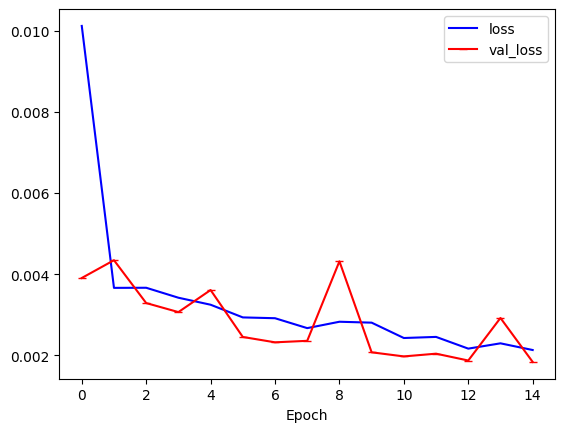

In [ ]:
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r-_', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test, Y_test)

40/40 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 0.0000e+00


[0.0018714263569563627, 0.0]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
url = 'diabetes_data.csv'
df = pd.read_csv(url)
print(df.shape)
df.head()

(520, 16)


,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


<Axes: >

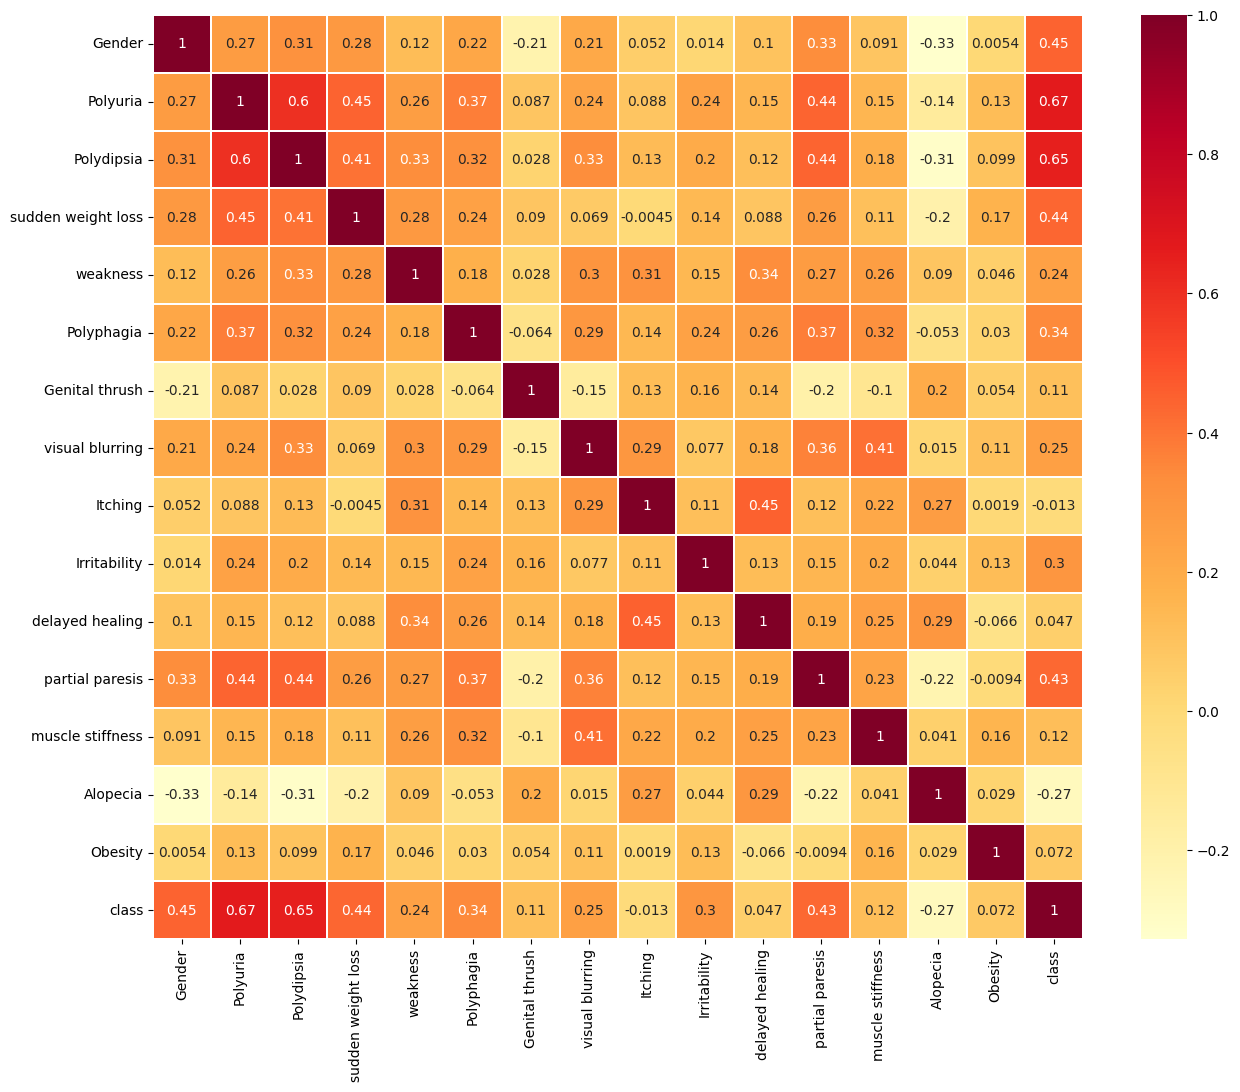

In [ ]:
import seaborn as sns
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), linewidth=0.1, vmax=1, cmap=plt.cm.YlOrRd, linecolor='white',annot=True)

In [ ]:
lim = int(len(df)*0.7)
train_x = df.iloc[:lim, 0:15].to_numpy()
test_x = df.iloc[lim:, 0:15].to_numpy()
train_y = df.iloc[:lim, 15].to_numpy()
test_y = df.iloc[lim:, 15].to_numpy()


In [ ]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((364, 15), (364,), (156, 15), (156,))

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver = 'lbfgs')

In [ ]:
model = log_reg.fit(train_x, train_y)

w=model.coef_
b=model.intercept_
print(w)
print(b)

[[ 2.40995192  2.46696383  2.54071842  0.46080374  0.33958916  0.65359499
   1.0902921   0.44062807 -1.10708967  1.08060712 -0.39961669  0.72347822
  -0.457545   -0.10556601  0.10743005]]
[-4.60337024]


In [ ]:
Y_predict = model.predict(test_x).flatten()
for i in range(10):
  label=test_y[i]
  prediction=Y_predict[i]
  print('실제당뇨여부:{:.0f}, 예측당뇨여부:{:.0f}'.format(label,prediction))


실제당뇨여부:1, 예측당뇨여부:1
실제당뇨여부:1, 예측당뇨여부:1
실제당뇨여부:1, 예측당뇨여부:1
실제당뇨여부:1, 예측당뇨여부:1
실제당뇨여부:1, 예측당뇨여부:1
실제당뇨여부:0, 예측당뇨여부:0
실제당뇨여부:0, 예측당뇨여부:0
실제당뇨여부:0, 예측당뇨여부:0
실제당뇨여부:0, 예측당뇨여부:1
실제당뇨여부:0, 예측당뇨여부:0


In [ ]:
y_pred = model.predict(test_x)
print('테스트 세트의 정확도:{:.2f}'.format(np.mean(y_pred==test_y)))
print('테스트 세트의 정확도:{:.2f}'.format(model.score(test_x, test_y)))

테스트 세트의 정확도:0.93
테스트 세트의 정확도:0.93


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(30, input_dim=15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(train_x,train_y, epochs=100, batch_size=10, validation_split=0.25)

Epoch 1/100
28/28 [==============================] - 2s 29ms/step - loss: 0.8925 - accuracy: 0.3223 - val_loss: 0.7563 - val_accuracy: 0.4176
Epoch 2/100
28/28 [==============================] - 0s 10ms/step - loss: 0.5923 - accuracy: 0.6703 - val_loss: 0.8367 - val_accuracy: 0.2967
Epoch 3/100
28/28 [==============================] - 0s 13ms/step - loss: 0.4445 - accuracy: 0.8095 - val_loss: 0.9187 - val_accuracy: 0.2857
Epoch 4/100
28/28 [==============================] - 0s 10ms/step - loss: 0.3888 - accuracy: 0.8168 - val_loss: 0.9523 - val_accuracy: 0.2857
Epoch 5/100
28/28 [==============================] - 0s 14ms/step - loss: 0.3605 - accuracy: 0.8168 - val_loss: 0.9470 - val_accuracy: 0.2857
Epoch 6/100
28/28 [==============================] - 0s 15ms/step - loss: 0.3405 - accuracy: 0.8168 - val_loss: 0.9308 - val_accuracy: 0.2857
Epoch 7/100
28/28 [==============================] - 0s 6ms/step - loss: 0.3229 - accuracy: 0.8168 - val_loss: 0.8880 - val_accuracy: 0.2857
Epoch 8

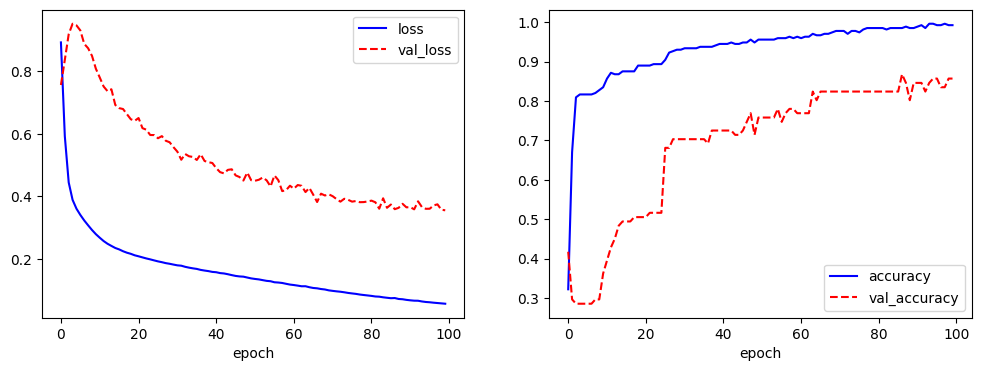

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('epoch')
plt.legend()


# **타이타닉 생존자 예측**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#타이타닉 승객 데이터 불러오기
url = 'Titanic.csv'
df_titanic = pd.read_csv(url)
print(df_titanic.shape)
df_titanic.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#결측치 개수 확인
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

데이터 전처리 1

In [ ]:
#Embarked 결측치 제거
df_titanic.dropna(subset=['Embarked'], axis=0,inplace=True)

In [ ]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
#나이 평균
age_mean = int(df_titanic['Age'].mean())
age_mean

29

In [ ]:
df_titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64

In [ ]:
#평균 나이로 결측치 대체
df_titanic['Age'].fillna(age_mean, inplace=True)

In [ ]:
df_titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    29.0
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64

In [ ]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

**데이터 전처리 2**

In [ ]:
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
#이름 대신 Title(호칭) 가져오기
df_titanic['Title'] = df_titanic['Name'].str.extract('([A-Za-z]+)\.')

In [ ]:
#성별에 따른 호칭
pd.crosstab(df_titanic['Title'],df_titanic['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
#범주 묶기
df_titanic['Title'] = df_titanic['Title'].replace('Mlle', 'Miss')
df_titanic['Title'] = df_titanic['Title'].replace('Mme', 'Mrs')
df_titanic['Title'] = df_titanic['Title'].replace('Ms', 'Miss')
df_titanic['Title'] = df_titanic['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir'],'Other')
df_titanic['Title']

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886    Other
887     Miss
888     Miss
889       Mr
890       Mr
Name: Title, Length: 889, dtype: object

**데이터 전처리 3**

In [ ]:
#인공지능 학습에 필요 없는 속성 제거
df_titanic.drop('PassengerId', axis=1, inplace=True)
df_titanic.drop('Name', axis=1, inplace=True)
df_titanic.drop('Ticket', axis=1, inplace=True)
df_titanic.drop('Cabin', axis=1, inplace=True)

In [ ]:
#성별 데이터 숫자로 변환
df_titanic['Sex'] = df_titanic['Sex'].replace('male', 1)
df_titanic['Sex'] = df_titanic['Sex'].replace('female', 2)

In [ ]:
#승선 항구 데이터 숫자로 변환
df_titanic['Embarked'] = df_titanic['Embarked'].replace('S', 1)
df_titanic['Embarked'] = df_titanic['Embarked'].replace('C', 2)
df_titanic['Embarked'] = df_titanic['Embarked'].replace('Q', 3)

In [ ]:
#호칭 데이터 숫자로 변환
df_titanic['Title'] = df_titanic['Title'].replace('Other', 0)
df_titanic['Title'] = df_titanic['Title'].replace('Miss', 1)
df_titanic['Title'] = df_titanic['Title'].replace('Mrs', 2)
df_titanic['Title'] = df_titanic['Title'].replace('Mr', 3)
df_titanic['Title'] = df_titanic['Title'].replace('Master', 4)

**의사결정 트리 모델 만들기**

In [ ]:
#종속 변수(Y)와 독립 변수(X)
Y = df_titanic['Survived']
X = df_titanic.drop('Survived', axis=1)

In [ ]:
#훈련 데이터와 테스트 데이터
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((622, 8), (267, 8), (622,), (267,))

In [ ]:
#의사결정 트리 알고리즘 호출 및 학습
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

**의사 결정 트리 모델 평가하기**

In [ ]:
#테스트 데이터 예측
dt_prediction = dt.predict(X_test)

In [ ]:
#예측 값과 실제 값을 비교해 정확도 구하기
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, dt_prediction)

0.7752808988764045

In [ ]:
#혼돈 행력과 평가 결과 확인
from sklearn.metrics import classification_report, confusion_matrix
print('혼동 행렬\n', confusion_matrix(Y_test, dt_prediction))
print('\n평가 지표\n', classification_report(Y_test, dt_prediction))

혼동 행렬
 [[131  29]
 [ 31  76]]

평가 지표
               precision    recall  f1-score   support

           0       0.81      0.82      0.81       160
           1       0.72      0.71      0.72       107

    accuracy                           0.78       267
   macro avg       0.77      0.76      0.77       267
weighted avg       0.77      0.78      0.77       267



In [ ]:
#결정 트리 시각화
from sklearn.tree import export_graphviz
import graphviz

dt_dot_data = export_graphviz(dt, out_file=None, class_names=["Not Survived", "Survived"], feature_names = X_train.columns, impurity=True, filled=True)

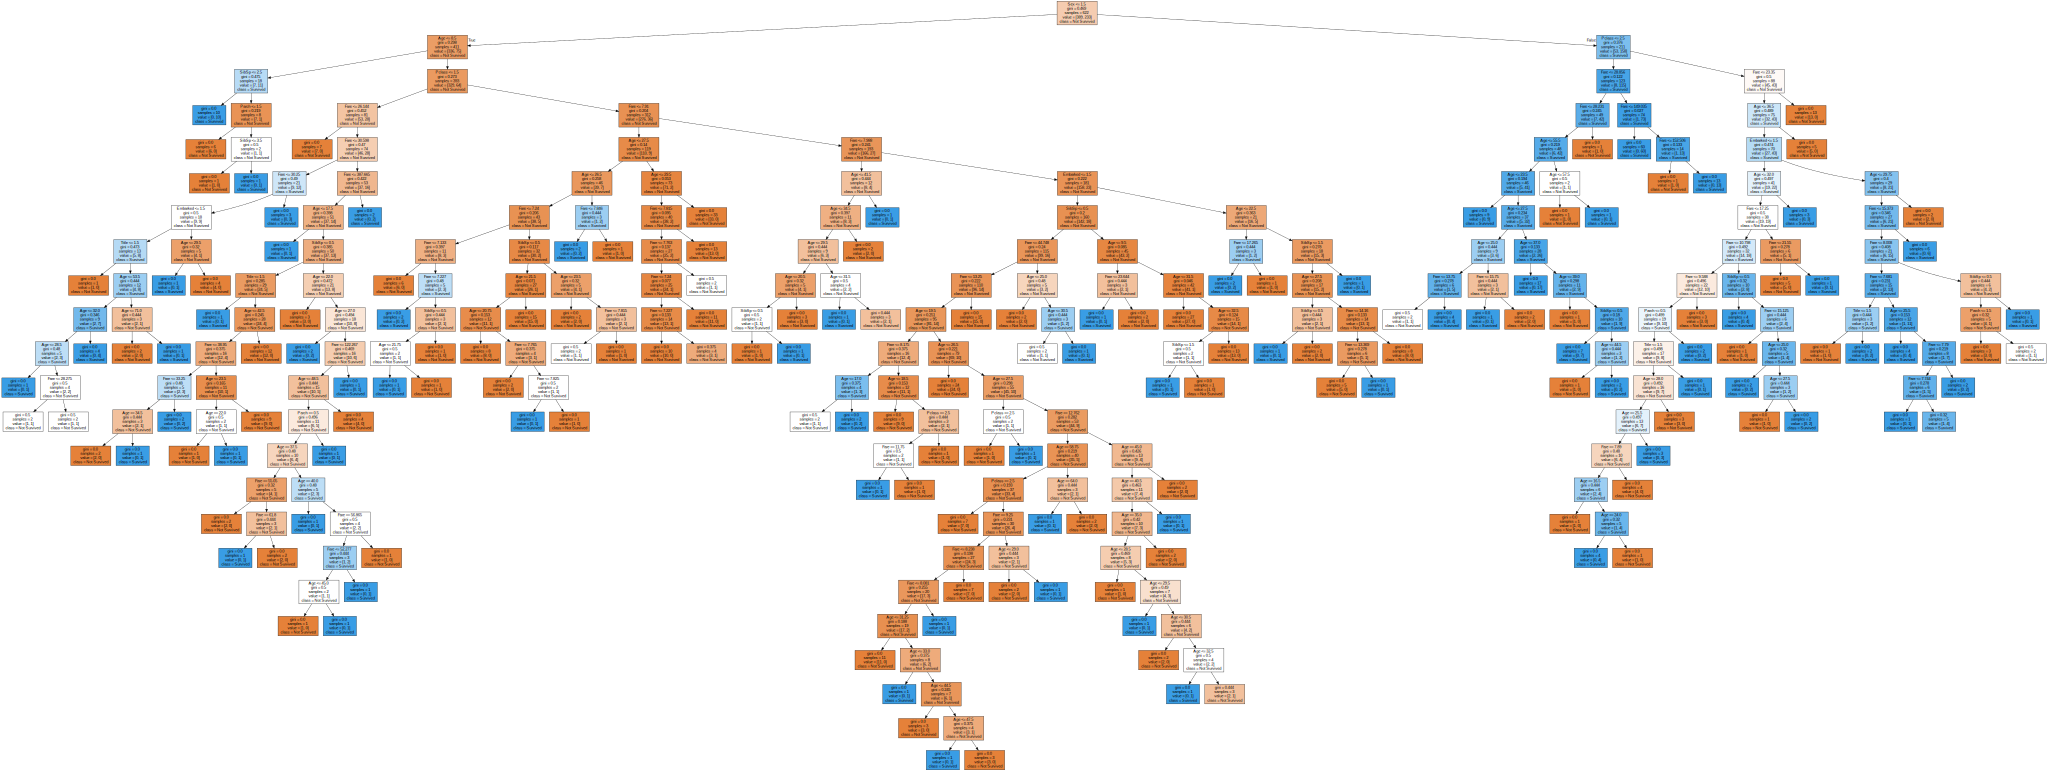

In [ ]:
graphviz.Source(dt_dot_data)

In [ ]:
#랜던 포레스트 모델 정의
from sklearn.ensemble import RandomForestClassifier

#트리 개수 최대 50개
rf = RandomForestClassifier(n_estimators=50, max_features=8, random_state=7)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_features=8, n_estimators=50, random_state=7)

In [ ]:
#의사결정 트리 테스트
rf_prediction = rf.predict(X_test)

In [ ]:
#정확도 출력
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, rf_prediction)

0.846441947565543

# 펭귄 종 분류


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("penguins.csv")

In [ ]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [ ]:
df["species"].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [ ]:
df["island"].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [ ]:
df["sex"].value_counts()

sex
male      168
female    165
Name: count, dtype: int64

<Axes: xlabel='species', ylabel='body_mass_g'>

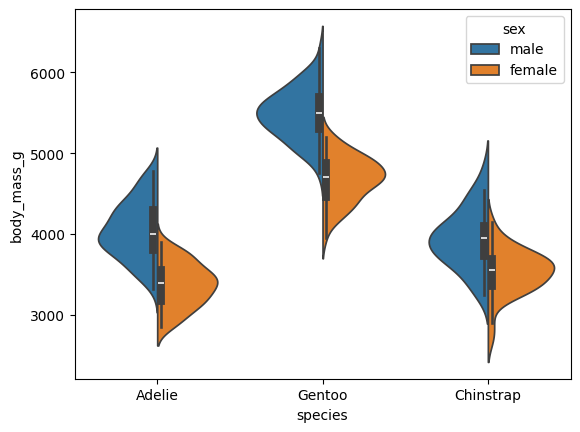

In [ ]:
sns.violinplot(x = "species", y = "body_mass_g", hue = "sex", data = df, split = True)

In [ ]:
#데이터 전처리
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
df[df['bill_length_mm'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [ ]:
#df = df.dropna(subset = ['bill_length_mm])
#결측치 제거
df.dropna(subset= ['bill_length_mm'], inplace = True)
df['sex'] = df['sex'].fillna('unknow')

In [ ]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
#라벨링
df['species'] = df['species'].map({"Adelie":0, "Gentoo":1, "Chinstrap":2})
df['island'] = df['island'].map({"Biscoe":0, "Dream":1, "Torgersen":2})
df['sex'] = df['sex'].map({"male":0, "female":1, "unknow":2})

In [ ]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,0
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
4,0,2,36.7,19.3,193.0,3450.0,1
5,0,2,39.3,20.6,190.0,3650.0,0


In [ ]:
dataset = df.values
X = dataset[:, 2:]
Y = dataset[:, 0]
X = np.asarray(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [ ]:
#SVM모델 학습
import sklearn.svm as svm
svm_model = svm.SVC(kernel = 'linear')

In [ ]:
svm_model.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
svm_model.score(X_train, Y_train)

1.0

In [ ]:
Y_prediction = svm_model.predict(X_test).flatten()
for i in range(10):
  label = Y_test[i]
  prediction = Y_prediction[i]
  print("실제: {:.0f}, 예측: {:.0f}".format(label, prediction))

실제: 2, 예측: 2
실제: 2, 예측: 2
실제: 2, 예측: 2
실제: 0, 예측: 0
실제: 1, 예측: 1
실제: 0, 예측: 0
실제: 1, 예측: 1
실제: 2, 예측: 2
실제: 0, 예측: 0
실제: 1, 예측: 1


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
svm_prediction = svm_model.predict(X_test)
print('혼돈 행렬\n', confusion_matrix(Y_test, svm_prediction))
print('\n평가 지표\n', classification_report(Y_test, svm_prediction))

혼돈 행렬
 [[29  0  0]
 [ 0 24  0]
 [ 2  0 14]]

평가 지표
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        29
         1.0       1.00      1.00      1.00        24
         2.0       1.00      0.88      0.93        16

    accuracy                           0.97        69
   macro avg       0.98      0.96      0.97        69
weighted avg       0.97      0.97      0.97        69



# [SVM경계탐구]

In [ ]:
#다항 분류 딥러닝 모델 학습
#원-핫 인코딩
from tensorflow.keras.utils import to_categorical
Y_encoded = to_categorical(Y)
Y = np.asarray(Y_encoded)
Y[0]

array([1., 0., 0.], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
tf.random.set_seed(3)
model = Sequential()
model.add(Dense(15, input_dim=5, activation='relu'))
model.add(Dense(3, activation = 'softmax'))

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, batch_size=10, epochs=200)
model.evaluate(X_test, Y_test)

Epoch 1/200
28/28 [==============================] - 2s 9ms/step - loss: 886.5628 - accuracy: 0.2015
Epoch 2/200
28/28 [==============================] - 0s 10ms/step - loss: 484.4792 - accuracy: 0.3004
Epoch 3/200
28/28 [==============================] - 0s 7ms/step - loss: 217.5747 - accuracy: 0.3077
Epoch 4/200
28/28 [==============================] - 0s 5ms/step - loss: 25.4512 - accuracy: 0.4322
Epoch 5/200
28/28 [==============================] - 0s 10ms/step - loss: 6.7952 - accuracy: 0.5201
Epoch 6/200
28/28 [==============================] - 0s 7ms/step - loss: 5.8448 - accuracy: 0.5018
Epoch 7/200
28/28 [==============================] - 0s 6ms/step - loss: 4.7952 - accuracy: 0.6007
Epoch 8/200
28/28 [==============================] - 0s 3ms/step - loss: 5.0999 - accuracy: 0.5348
Epoch 9/200
28/28 [==============================] - 0s 2ms/step - loss: 7.0191 - accuracy: 0.5678
Epoch 10/200
28/28 [==============================] - 0s 2ms/step - loss: 5.0665 - accuracy: 0.5458


[0.30553701519966125, 0.8405796885490417]

In [ ]:
#예측값과 실제값 비교
y_prediction = model.predict(X)
label = Y_encoded[1]
prediction = y_prediction[1]
print(label)
print(prediction)

11/11 [==============================] - 0s 2ms/step
[1. 0. 0.]
[9.7486830e-01 4.6695441e-05 2.5084954e-02]


In [ ]:
svm_data = pd.read_csv("penguins.csv")

In [ ]:
scm_y = svm_data['species']
svm_x = svm_data.drop('species', axis = 1)

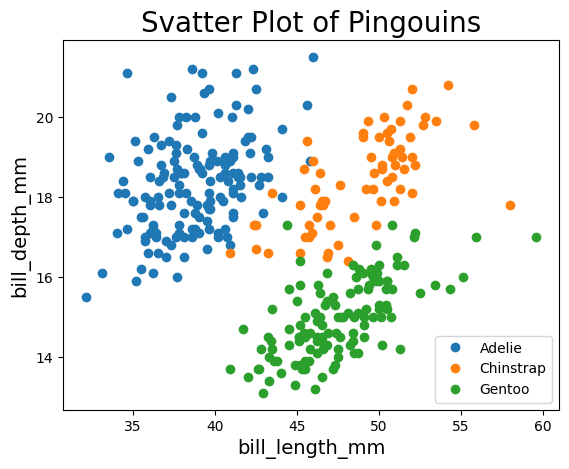

In [ ]:
groups = svm_data.groupby('species')

fig, ax = plt.subplots()
for name, group in groups:
  ax.plot(group.bill_length_mm, group.bill_depth_mm, marker = 'o', linestyle = '', label=name)
ax.legend(fontsize=10, loc='lower right')
plt.title('Svatter Plot of Pingouins', fontsize = 20)
plt.xlabel('bill_length_mm', fontsize = 14)
plt.ylabel('bill_depth_mm', fontsize = 14)
plt.show()

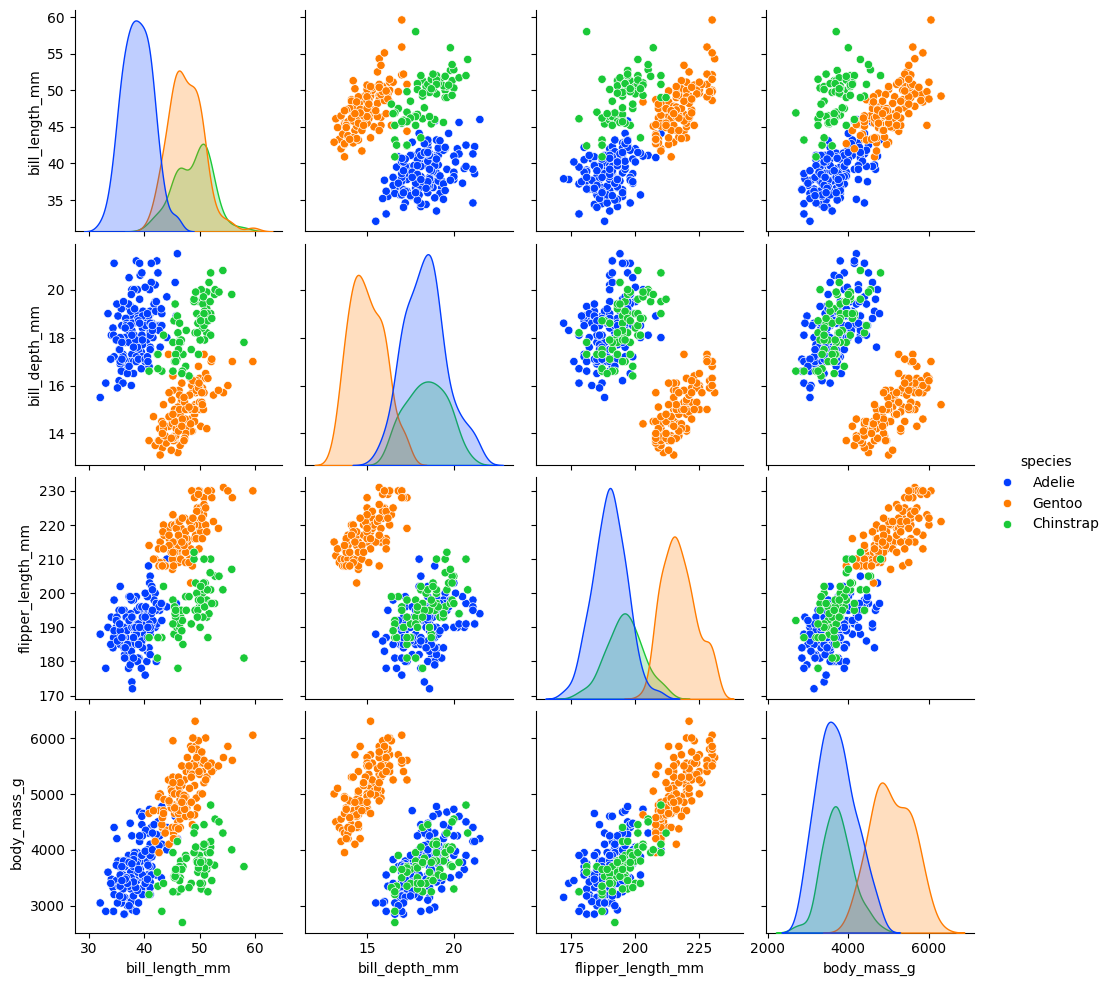

In [ ]:
svm_x2 = svm_data.drop(['island', 'sex'], axis = 1)
sns.pairplot(svm_x2, hue = "species", palette = 'bright')

In [ ]:
svm_test = svm_data[(svm_data['species']!='Chinstrap')]
svm_test = svm_test.drop(['island', 'flipper_length_mm', 'body_mass_g', 'sex'], axis= 1)
svm_test.dropna(subset = ['bill_length_mm'], inplace = True)
svm_test.head()

,species,bill_length_mm,bill_depth_mm
0,Adelie,39.1,18.7
1,Adelie,39.5,17.4
2,Adelie,40.3,18.0
4,Adelie,36.7,19.3
5,Adelie,39.3,20.6


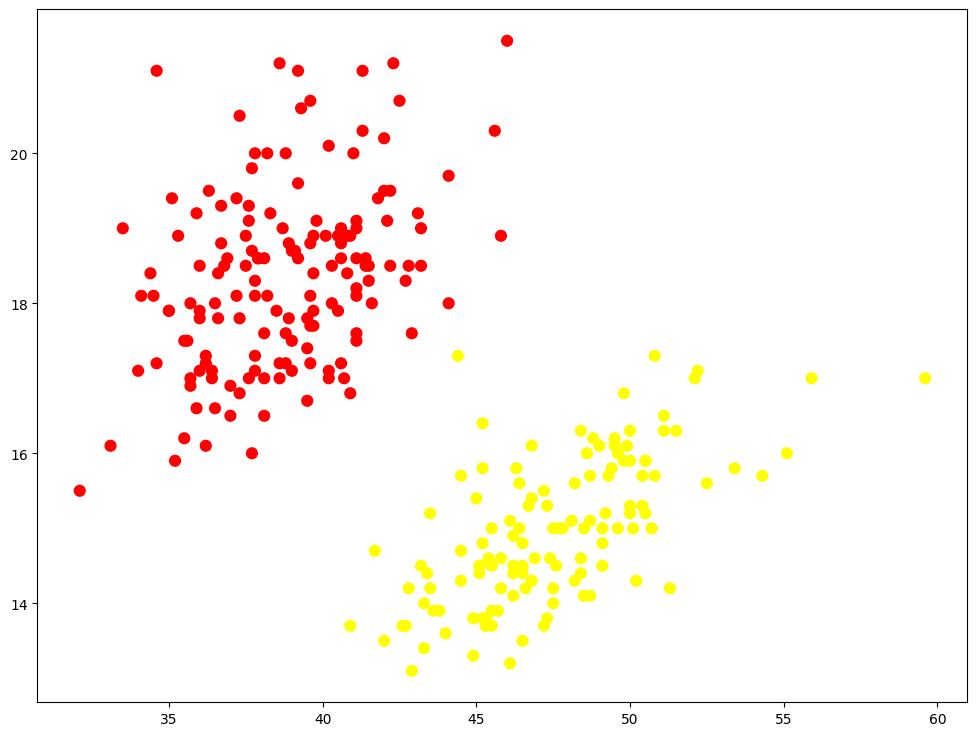

In [ ]:
svm_test = svm_test.replace('Adelie', 0)
svm_test = svm_test.replace('Gentoo', 1)
svm_X = svm_test.iloc[:,1:3]
svm_Y = svm_test['species']
plt.figure(figsize=(12, 9))
plt.scatter(svm_X.iloc[:, 0], svm_X.iloc[:, 1], c = svm_Y, s = 60, cmap = 'autumn')
plt.show()

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear', C = 10)
model.fit(svm_X, svm_Y)

SVC(C=10, kernel='linear')

In [ ]:
model.support_vectors_

array([[44.1, 18. ],
       [44.4, 17.3]])

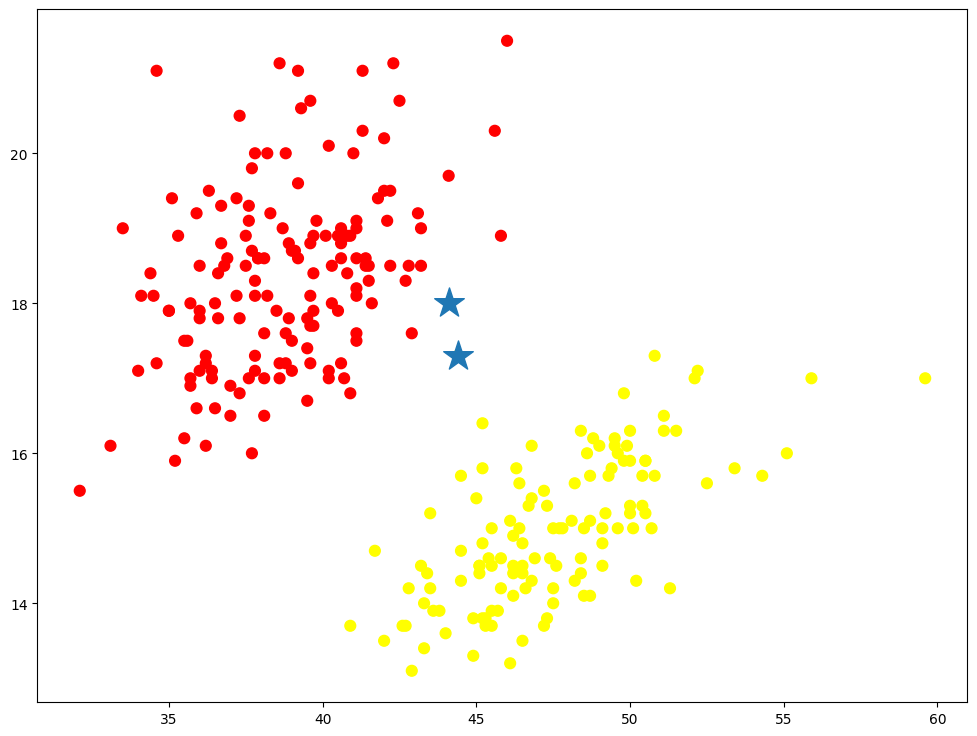

In [ ]:
plt.figure(figsize = (12, 9))
plt.scatter(svm_X.iloc[:, 0], svm_X.iloc[:, 1], c = svm_Y, s = 60, cmap = 'autumn')
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=500, marker='*')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
<ipython-input-54-c102dd8d18c7>:13: UserWarning: The following kwargs were not used by contour: 'aplha'
  ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], aplha=0.5, linestyles=['--','-','--'])


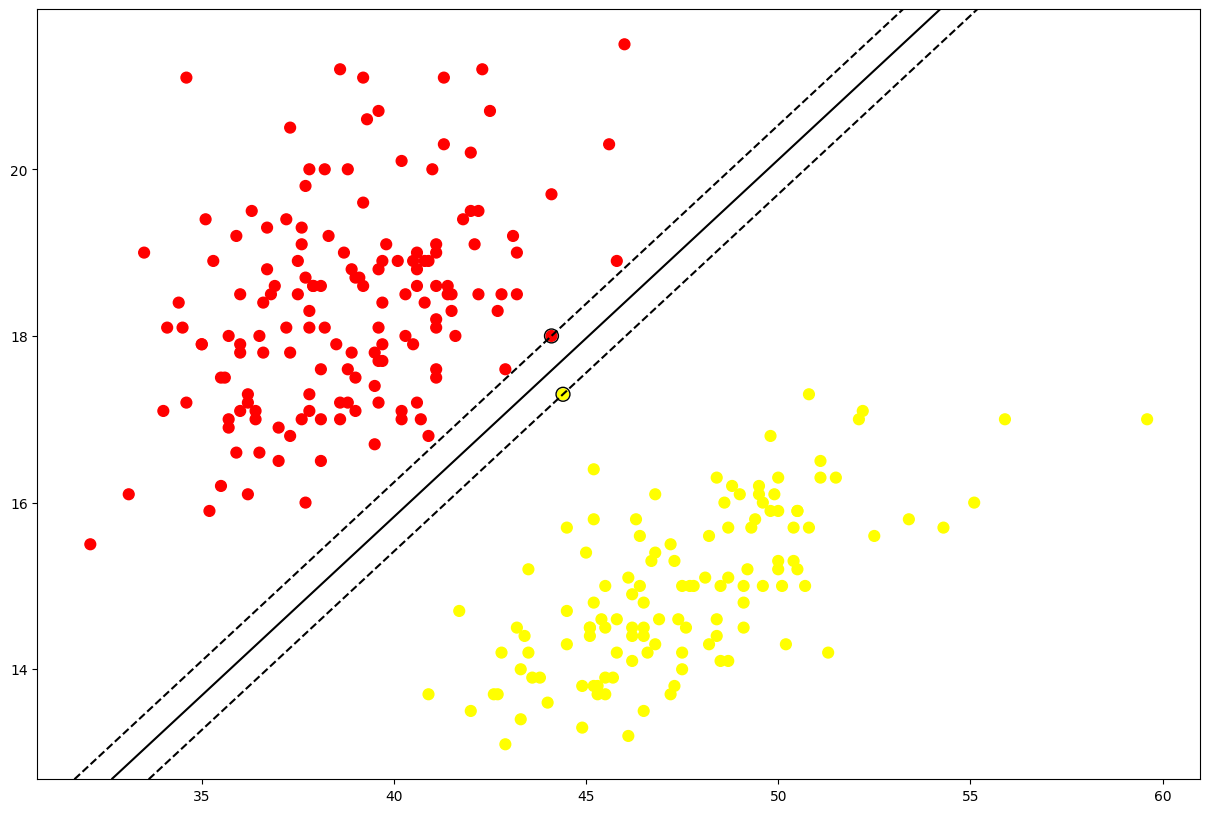

In [ ]:
plt.figure(figsize = (15, 10))
ax = plt.gca()
plt.scatter(svm_X.iloc[:,0], svm_X.iloc[:,1], c = svm_Y, s=60, cmap='autumn')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], aplha=0.5, linestyles=['--','-','--'])
ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1], s = 100, linewidth = 1, facecolors='none', edgecolors='k')
plt.show()

# 초기 탈모 예측

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("hair_loss.xlsx")
df.head()

,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,stress_level,swimming,hair_washing,dandruff
0,Few,2,Low,0,1,Low,No,Y,Nothing
1,Few,0,Low,0,3,Low,No,N,Nothing
2,Medium,3,Low,1,0,Low,Yes,Y,Nothing
3,Few,2,Low,0,1,Low,No,N,Nothing
4,Few,2,Low,0,1,Low,No,Y,Nothing


In [ ]:
print(df["hair_loss"].value_counts())
print(df["pressure_level"].value_counts())
print(df["stress_level"].value_counts())
print(df["hair_loss"].value_counts())
print(df["swimming"].value_counts())
print(df["hair_washing"].value_counts())
print(df["dandruff"].value_counts())

hair_loss
Few       169
Medium    167
Many       42
A lot      22
Name: count, dtype: int64
pressure_level
Low          275
Medium        57
High          45
Very High     23
Name: count, dtype: int64
stress_level
Low          261
Medium        56
High          45
Very High     38
Name: count, dtype: int64
hair_loss
Few       169
Medium    167
Many       42
A lot      22
Name: count, dtype: int64
swimming
No     307
Yes     93
Name: count, dtype: int64
hair_washing
N    209
Y    191
Name: count, dtype: int64
dandruff
Nothing    289
Few         76
Many        35
Name: count, dtype: int64


In [ ]:
df.isnull().sum()

hair_loss                 0
stay_up_late              0
pressure_level            0
coffee_consumed           0
brain_working_duration    0
stress_level              0
swimming                  0
hair_washing              0
dandruff                  0
dtype: int64

In [ ]:
df['dandruff'].replace('Nothing', 0, inplace = True)
df['dandruff'].replace('Few', 1, inplace = True)
df['dandruff'].replace('Many', 2, inplace = True)

df['hair_loss'].replace('Few', 0, inplace = True)
df['hair_loss'].replace('Medium', 1, inplace = True)
df['hair_loss'].replace('Many', 2, inplace = True)
df['hair_loss'].replace('A lot', 3, inplace = True)

df['swimming'].replace('Yes', 1, inplace = True)
df['swimming'].replace('No', 0, inplace = True)

df['hair_washing'].replace('Y', 1, inplace = True)
df['hair_washing'].replace('N', 0, inplace = True)

df.replace('Low', 0, inplace = True)
df.replace('Medium', 1, inplace = True)
df.replace('High', 2, inplace = True)
df.replace('Very High', 3, inplace = True)

df.head()

,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,stress_level,swimming,hair_washing,dandruff
0,0,2,0,0,1,0,0,1,0
1,0,0,0,0,3,0,0,0,0
2,1,3,0,1,0,0,1,1,0
3,0,2,0,0,1,0,0,0,0
4,0,2,0,0,1,0,0,1,0


In [ ]:
X_df = df.drop('hair_loss', axis = 1)
X_df.head()

,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,stress_level,swimming,hair_washing,dandruff
0,2,0,0,1,0,0,1,0
1,0,0,0,3,0,0,0,0
2,3,0,1,0,0,1,1,0
3,2,0,0,1,0,0,0,0
4,2,0,0,1,0,0,1,0


In [ ]:
X_data = X_df.to_numpy()
X_data.shape

(400, 8)

In [ ]:
Y_data = df['hair_loss'].to_numpy()
Y_data.shape

(400,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.05, random_state = 42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((380, 8), (20, 8), (380,), (20,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_model.score(X_train, Y_train)

0.9368421052631579

In [ ]:
knn_model.score(X_test, Y_test)

0.8

<function matplotlib.pyplot.show(close=None, block=None)>

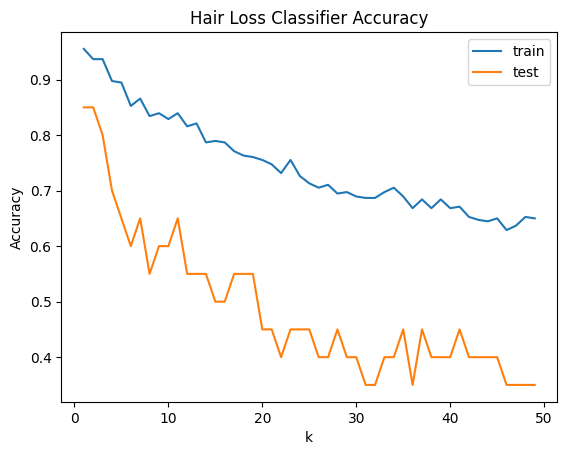

In [ ]:
k_list = range(1, 50)
acc_train = []
acc_test = []

for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(X_train, Y_train)
  acc_train.append(classifier.score(X_train,  Y_train))
  acc_test.append(classifier.score(X_test, Y_test))
plt.plot(k_list, acc_train, label = 'train')
plt.plot(k_list, acc_test, label = 'test')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Hair Loss Classifier Accuracy")
plt.legend()
plt.show

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
knn_prediction = knn_model.predict(X_test)
print('혼동 행렬\n', confusion_matrix(Y_test, knn_prediction))
print('\n평가 지표\n', classification_report(Y_test, knn_prediction, zero_division = 0))

혼동 행렬
 [[ 4  1  0  0]
 [ 2 10  0  0]
 [ 0  0  2  0]
 [ 0  0  1  0]]

평가 지표
               precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.91      0.83      0.87        12
           2       0.67      1.00      0.80         2
           3       0.00      0.00      0.00         1

    accuracy                           0.80        20
   macro avg       0.56      0.66      0.60        20
weighted avg       0.78      0.80      0.78        20



In [ ]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 767.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=833349cf8cabcbf4682d34263458ffca8e70917f083e00158bfa9708c6abf478
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import np_utils
from tensorflow.keras.utils import to_categorical
Y_encoded = to_categorical(Y_data)
Y = np.asarray(Y_encoded)
Y[0]

array([1., 0., 0., 0.], dtype=float32)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y, test_size = 0.05, random_state = 42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((380, 8), (20, 8), (380, 4), (20, 4))

In [ ]:
tf.random.set_seed(3)
model = Sequential()
model.add(Dense(72, input_dim = 8, activation = 'relu'))
model.add(Dense(36, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs = 150, batch_size = 10, validation_split = 0.1)

Epoch 1/150
35/35 [==============================] - 2s 18ms/step - loss: 1.4707 - accuracy: 0.3889 - val_loss: 1.2513 - val_accuracy: 0.4737
Epoch 2/150
35/35 [==============================] - 0s 5ms/step - loss: 1.1853 - accuracy: 0.4854 - val_loss: 1.0558 - val_accuracy: 0.5000
Epoch 3/150
35/35 [==============================] - 0s 5ms/step - loss: 0.9631 - accuracy: 0.5439 - val_loss: 0.8403 - val_accuracy: 0.6842
Epoch 4/150
35/35 [==============================] - 0s 5ms/step - loss: 0.7751 - accuracy: 0.7544 - val_loss: 0.6768 - val_accuracy: 0.7368
Epoch 5/150
35/35 [==============================] - 0s 5ms/step - loss: 0.6270 - accuracy: 0.8012 - val_loss: 0.5969 - val_accuracy: 0.7368
Epoch 6/150
35/35 [==============================] - 0s 6ms/step - loss: 0.5575 - accuracy: 0.8041 - val_loss: 0.5181 - val_accuracy: 0.7368
Epoch 7/150
35/35 [==============================] - 1s 19ms/step - loss: 0.5194 - accuracy: 0.8070 - val_loss: 0.4841 - val_accuracy: 0.7895
Epoch 8/150

In [ ]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 56ms/step - loss: 0.1991 - accuracy: 0.9500


[0.19908204674720764, 0.949999988079071]

# 택배 시스템 최적화

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Delivery.csv")
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Num        371 non-null    int64  
 1   Latitude   371 non-null    float64
 2   Longitude  371 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 8.8 KB


In [ ]:
XY = np.array(df)

In [ ]:
X = XY[:,1:]

In [ ]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

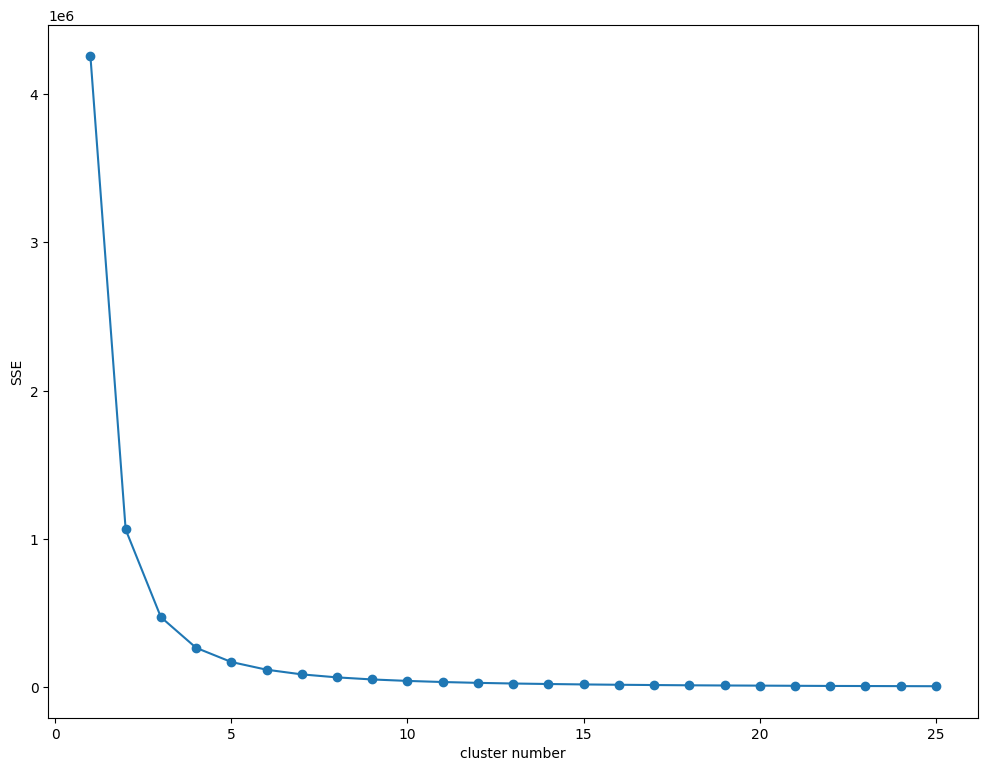

In [ ]:
def elbow(X, n):
    sse = []
    for i in range(1, n+1):
        km = KMeans(n_clusters = i)
        km.fit(X)
        sse.append(km.inertia_)
    plt.figure(figsize = (12, 9))
    plt.plot(range(1, n+1), sse, marker='o')
    plt.xlabel('cluster number')
    plt.ylabel('SSE')
    plt.show()

elbow(df, 25)

In [ ]:
k = 5
C_x = np.random.choice(X[:,0],k)
C_y = np.random.choice(X[:,1], k)
C = np.array(list(zip(C_x, C_y)))
print(C)

[[ 37.34661  126.789632]
 [ 37.522977 126.833908]
 [ 37.304232 126.759906]
 [ 37.506256 126.780414]
 [ 37.416532 126.678827]]


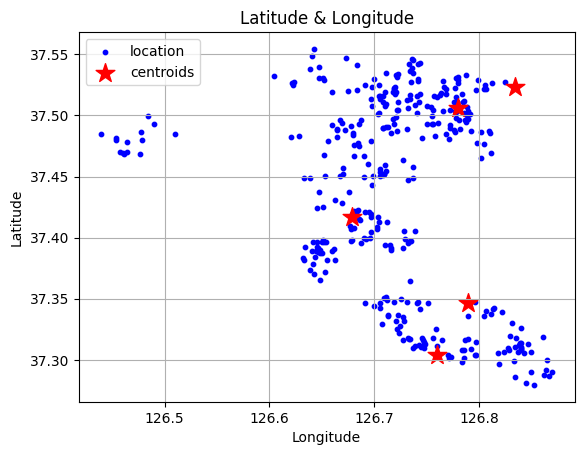

In [ ]:
lat = df['Latitude']
lon = df['Longitude']
plt.title('Latitude & Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(lon, lat, c = 'blue', s =10, label = 'location')
plt.scatter(C_y, C_x, marker='*', s = 200, c='red', label = 'centroids')
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [ ]:
def distance(A, B):
    return np.sqrt(np.sum(np.power((A-B),2)))

In [ ]:
C_old = np.zeros(C.shape)
clusters = np.zeros(len(X))
flag = distance(C,C_old)
print(C_old)
print(flag)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
295.4555983908853


In [ ]:
C_island = (37.48, 126.4)
C_x = np.random.choice(X[:,0],k-1)
C_y = np.random.choice(X[:,1],k-1)
C = list(zip(C_x, C_y))
C.append(C_island)
C = np.array(C)
print(C)

[[ 37.287066 126.633335]
 [ 37.466792 126.685668]
 [ 37.318011 126.621355]
 [ 37.396439 126.705408]
 [ 37.48     126.4     ]]


In [ ]:
import copy
distances=[]
while flag!=0:
    for i in range(len(X)):
        for j in range(k):
            temp=distance(X[i],C[j])
            distances.append(temp)
        cluster=np.argmin(distances)
        clusters[i]=cluster
        distances=[]

    C_old = copy.deepcopy(C)

    for i in range(k):
        points=[X[j]for j in range(len(X)) if clusters[j]==i]
        for r in range(len(points)):
            C[i][0]=np.mean(points[r][0])
            C[i][1]=np.mean(points[r][1])

    flag=distance(C,C_old)

<ipython-input-50-bff3da8d4c79>:3: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[clusters == 1,1], X[clusters == 1,0], s = 50, c = 'yellow', marker = 'x', edgecolor = 'black', label = 'B')


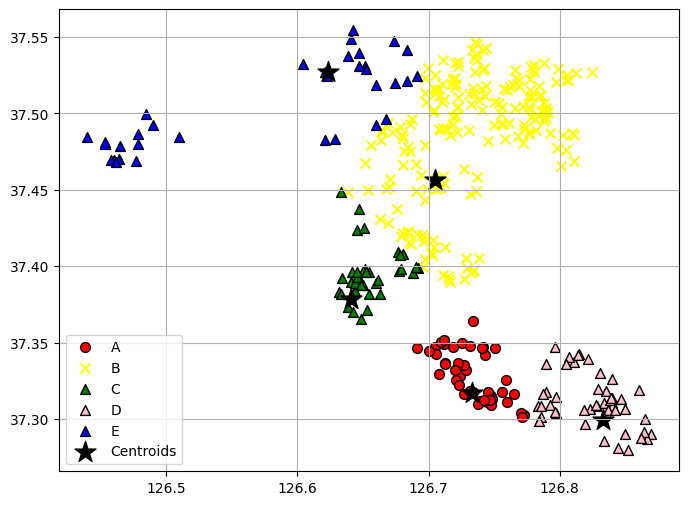

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[clusters == 0,1], X[clusters == 0,0], s = 50, c = 'red', marker = 'o', edgecolor = 'black', label = 'A')
plt.scatter(X[clusters == 1,1], X[clusters == 1,0], s = 50, c = 'yellow', marker = 'x', edgecolor = 'black', label = 'B')
plt.scatter(X[clusters == 2,1], X[clusters == 2,0], s = 50, c = 'green', marker = '^', edgecolor = 'black', label = 'C')
plt.scatter(X[clusters == 3,1], X[clusters == 3,0], s = 50, c = 'pink', marker = '^', edgecolor = 'black', label = 'D')
plt.scatter(X[clusters == 4,1], X[clusters == 4,0], s = 50, c = 'blue', marker = '^', edgecolor = 'black', label = 'E')
plt.scatter(C[:,1], C[:,0], s = 250, marker='*', c = 'black', edgecolor='black', label = 'Centroids')
plt.legend()
plt.grid()
plt.show()

In [ ]:
!pip install folium

In [ ]:
import folium as gm

In [ ]:
g_map = gm.Map(location = [37.428531, 126.596539], zoom_start = 12)
g_map

In [ ]:
m_color = ['blue', 'red', 'green', 'purple', 'orange']
for i in range(k):
    for j in range(len(X[clusters == i,1])):
        marker = gm.CircleMarker([X[clusters == i, 0][j], X[clusters == i, 1][j]], radius = 3, color = m_color[i])
        marker.add_to(g_map)
g_map

In [ ]:
for i in range(len(C)):
    marker = gm.Marker([C[i][0], C[i][1]], popup = 'kMeans Point', icon = gm.Icon(icon = 'star', color = 'black'))
    marker.add_to(g_map)
g_map

In [ ]:
for i in range(len(C)):
    marker = gm.CircleMarker([C[i][0], C[i][1]],radius = 150,  popup = 'kMeans Point', color = m_color[i], fill_color = m_color[i])
    marker.add_to(g_map)
g_map

# 수도권 아파트 가격 예측

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"ktb1004","key":"6a5861e2f793e0982354bb3cb43c7c48"}'}

In [ ]:
!kaggle datasets download -d brainer3220/korean-real-estate-transaction-data
!unzip korean-real-estate-transcation-data
!ls

Dataset URL: https://www.kaggle.com/datasets/brainer3220/korean-real-estate-transaction-data
License(s): DbCL-1.0
korean-real-estate-transaction-data.zip: Skipping, found more recently modified local copy (use --force to force download)
unzip:  cannot find or open korean-real-estate-transcation-data, korean-real-estate-transcation-data.zip or korean-real-estate-transcation-data.ZIP.
'kaggle (1).json'   kaggle.json   korean-real-estate-transaction-data.zip   sample_data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = '/content/Apart Deal.csv'
df = pd.read_csv(url, delimiter = ",")

<ipython-input-99-6a61db9eae06>:2: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, delimiter = ",")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5002839 entries, 0 to 5002838
Data columns (total 9 columns):
 #   Column  Dtype  
---  ------  -----  
 0   지역코드    float64
 1   법정동     object 
 2   거래일     object 
 3   아파트     object 
 4   지번      object 
 5   전용면적    float64
 6   층       object 
 7   건축년도    float64
 8   거래금액    object 
dtypes: float64(3), object(6)
memory usage: 343.5+ MB


In [ ]:
df.head()

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700


In [ ]:
df = df.drop(['법정동', '아파트', '지번'], axis = 1)
df.head()

,지역코드,거래일,전용면적,층,건축년도,거래금액
0,31110.0,5/30/2020 0:00,135.5800,8,1991.0,26700
1,31110.0,1/3/2020 0:00,101.6000,2,2006.0,35500
2,31110.0,1/3/2020 0:00,84.9920,11,2007.0,36500
3,31110.0,1/3/2020 0:00,118.7060,8,2006.0,43000
4,31110.0,1/4/2020 0:00,84.9636,7,2007.0,38700


In [ ]:
areacode = []
gecode = []
for code in df['지역코드']:
    acode = str(code)[0:2]
    gcode = str(code)[2:5]
    areacode.append(int(acode))
    gecode.append(int(gcode))
df['지역'] = gecode
df['지역코드'] = areacode

In [ ]:
df.head()

,지역코드,거래일,전용면적,층,건축년도,거래금액,지역
0,31,5/30/2020 0:00,135.5800,8,1991.0,26700,110
1,31,1/3/2020 0:00,101.6000,2,2006.0,35500,110
2,31,1/3/2020 0:00,84.9920,11,2007.0,36500,110
3,31,1/3/2020 0:00,118.7060,8,2006.0,43000,110
4,31,1/4/2020 0:00,84.9636,7,2007.0,38700,110


In [ ]:
df2 = df[df['지역코드']==11]
df3 = df[df['지역코드'] == 41]

In [ ]:
df = pd.concat([df2, df3])

In [ ]:
df.head()

,지역코드,거래일,전용면적,층,건축년도,거래금액,지역
655312,11,1/13/2018,140.78,15,2004.0,130000,110
655313,11,1/19/2018,103.77,5,2003.0,96000,110
655314,11,1/23/2018,123.13,10,2004.0,118000,110
655315,11,1/30/2018,66.96,13,1994.0,54500,110
655316,11,1/31/2018,76.66,11,1994.0,64000,110


In [ ]:
import re

In [ ]:
day = []
for data in df['거래일']:
    data  = data.split(' ')
    data = data[0]
    data = re.split('/|-', data)
    if len(data[0])==4:
        data = int(data[0] + data[1]+ data[2])
    else:
        if len(data[0]) == 1:
            data[0] = '0' + data[0]
            if len(data[1])==1:
                data[1] = '0' + data[1]
        data = int(data[2] + data[0] + data[1])
    day.append(data)
df['거래일'] = day

In [ ]:
df.tail()

,지역코드,거래일,전용면적,층,건축년도,거래금액,지역
4869944,41,20230426,65.2134,5,2007.0,"11,500",830
4869945,41,20230413,76.1100,7,2016.0,"36,500",830
4869946,41,20230414,59.7400,12,2004.0,"17,000",830
4869947,41,20230419,76.1100,11,2016.0,"36,500",830
4869948,41,20230421,76.1100,3,2016.0,"35,000",830


In [ ]:
df['거래금액'] = df['거래금액'].astype('str')
df['거래금액'] = df['거래금액'].str.replace(',','')
df['거래금액'] = df['거래금액'].astype('int')

In [ ]:
df['층'] = pd.to_numeric(df['층'], errors = 'coerce').fillna(0)

In [ ]:
df['지역코드'] = df['지역코드'].astype('category')
df['지역'] = df['지역'].astype('category')
df['건축년도'] = df['건축년도'].astype('category')
df['거래일'] = df['거래일'].astype('category')
df['층'] = df['층'].astype('category')
df = df[['지역코드', '지역', '건축년도', '거래일', '층', '전용면적', '거래금액']]

In [ ]:
df.sort_values(by = ['지역'], axis=0)

,지역코드,지역,건축년도,거래일,층,전용면적,거래금액
655312,11,110,2004.0,20180113,15.0,140.7800,130000
4313876,11,110,2003.0,20210519,5.0,84.5000,84800
4313877,11,110,1993.0,20210522,2.0,54.7000,62900
4313878,11,110,1999.0,20210525,2.0,59.9500,79500
4313879,11,110,1993.0,20210526,12.0,64.6600,68800
...,...,...,...,...,...,...,...
206055,41,830,2010.0,20200310,5.0,84.9088,24800
206054,41,830,2010.0,20200310,5.0,84.9679,24000
206053,41,830,2010.0,20200307,3.0,84.9088,23500
3329071,41,830,2000.0,20160123,2.0,59.8950,17400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2107212 entries, 655312 to 4869948
Data columns (total 7 columns):
 #   Column  Dtype   
---  ------  -----   
 0   지역코드    category
 1   지역      category
 2   건축년도    category
 3   거래일     category
 4   층       category
 5   전용면적    float64 
 6   거래금액    int64   
dtypes: category(5), float64(1), int64(1)
memory usage: 60.4 MB


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn import metrics

In [ ]:
seed = 0
np.random.seed(seed)
seed = tf.random.set_seed(3)

In [ ]:
dataset = df.values
X = dataset[:,0:6]
Y = dataset[:,6]

X = np.asarray(X)
Y = np.asarray(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 7)

In [ ]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = seed)
forest = RandomForestRegressor(n_estimators = 100, random_state = seed , n_jobs=-1)

In [ ]:
for train, test in kfold.split(X_train, Y_train):
    print("TRAIN: ", train, "TEST: ", test)
    x_train, x_test = X_train[train], X_train[test]
    y_train, y_test = Y_train[train], Y_train[test]

    forest.fit(x_train, y_train)

    y_pred = forest.predict(x_test)

    print('validation split rmse : {:.4f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
    print('validation split R2 : {:.4f}'.format(metrics.r2_score(y_test, y_pred)))

TRAIN:  [      0       1       2 ... 1685765 1685767 1685768] TEST:  [      4      18      26 ... 1685758 1685762 1685766]


ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
cross_validate(forest, X_train, Y_train, cv = kfold.scoring=['r2'], return_train_score = True)

SyntaxError: invalid syntax (<ipython-input-135-e1afa4943e71>, line 1)

In [ ]:
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, Y_test)))
pred = forest.predict(X_test)
print('rmse : {:.4f}'.format(np.sqrt(metrics.mean_squared_error(Y_test, pred))))
print('R2 : {:.4f}', format(metrics.r2_socre(Y_test, pred)))

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
for i in range(0, 20):
    print('실제 아파트 가격: %d만 원, 예측 아파트 가격: %d만 원' %(Y_test[i], pred[i]))

NameError: name 'pred' is not defined

In [ ]:
import xgboost
from xgboost import XGBRegressor

In [ ]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = seed)
sgb = XGBRegressor(max_depth = 20, learning_rate = 0.1 , n_estimators = 100,  n_jobs=-1)

In [ ]:
for train, test in kfold.split(X_train, Y_train):
    print("TRAIN: ", train, "TEST: ", test)
    x_train, x_test = X_train[train], X_train[test]
    y_train, y_test = Y_train[train], Y_train[test]

    xgb.fit(x_train, y_train)

    y_pred2 = forest.predict(x_test)

    print('validation split rmse : {:.4f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred2))))
    print('validation split R2 : {:.4f}'.format(metrics.r2_score(y_test, y_pred2)))

TRAIN:  [      0       2       3 ... 1685765 1685767 1685768] TEST:  [      1       4       9 ... 1685752 1685763 1685766]


NameError: name 'xgb' is not defined

In [ ]:
cross_validata(xgb, X_train, Y_Train, cv = kfold, scoring = ['r2'], return_train_score = True)

NameError: name 'cross_validata' is not defined

In [ ]:
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, Y_test)))
pred2 = xgb.predict(X_test)
print('rmse : {:.4f}'.format(np.sqrt(metrics.mean_squared_error(Y_test, pred2))))
print('R2 : {:.4f}', format(metrics.r2_socre(Y_test, pred2)))

In [ ]:
for i in range(0, 20):
    print('실제 아파트 가격: %d만 원, 예측 아파트 가격 : %d만 원' %(Y_test[i], pred2[i]))

NameError: name 'pred2' is not defined

NameError: name 'pred' is not defined

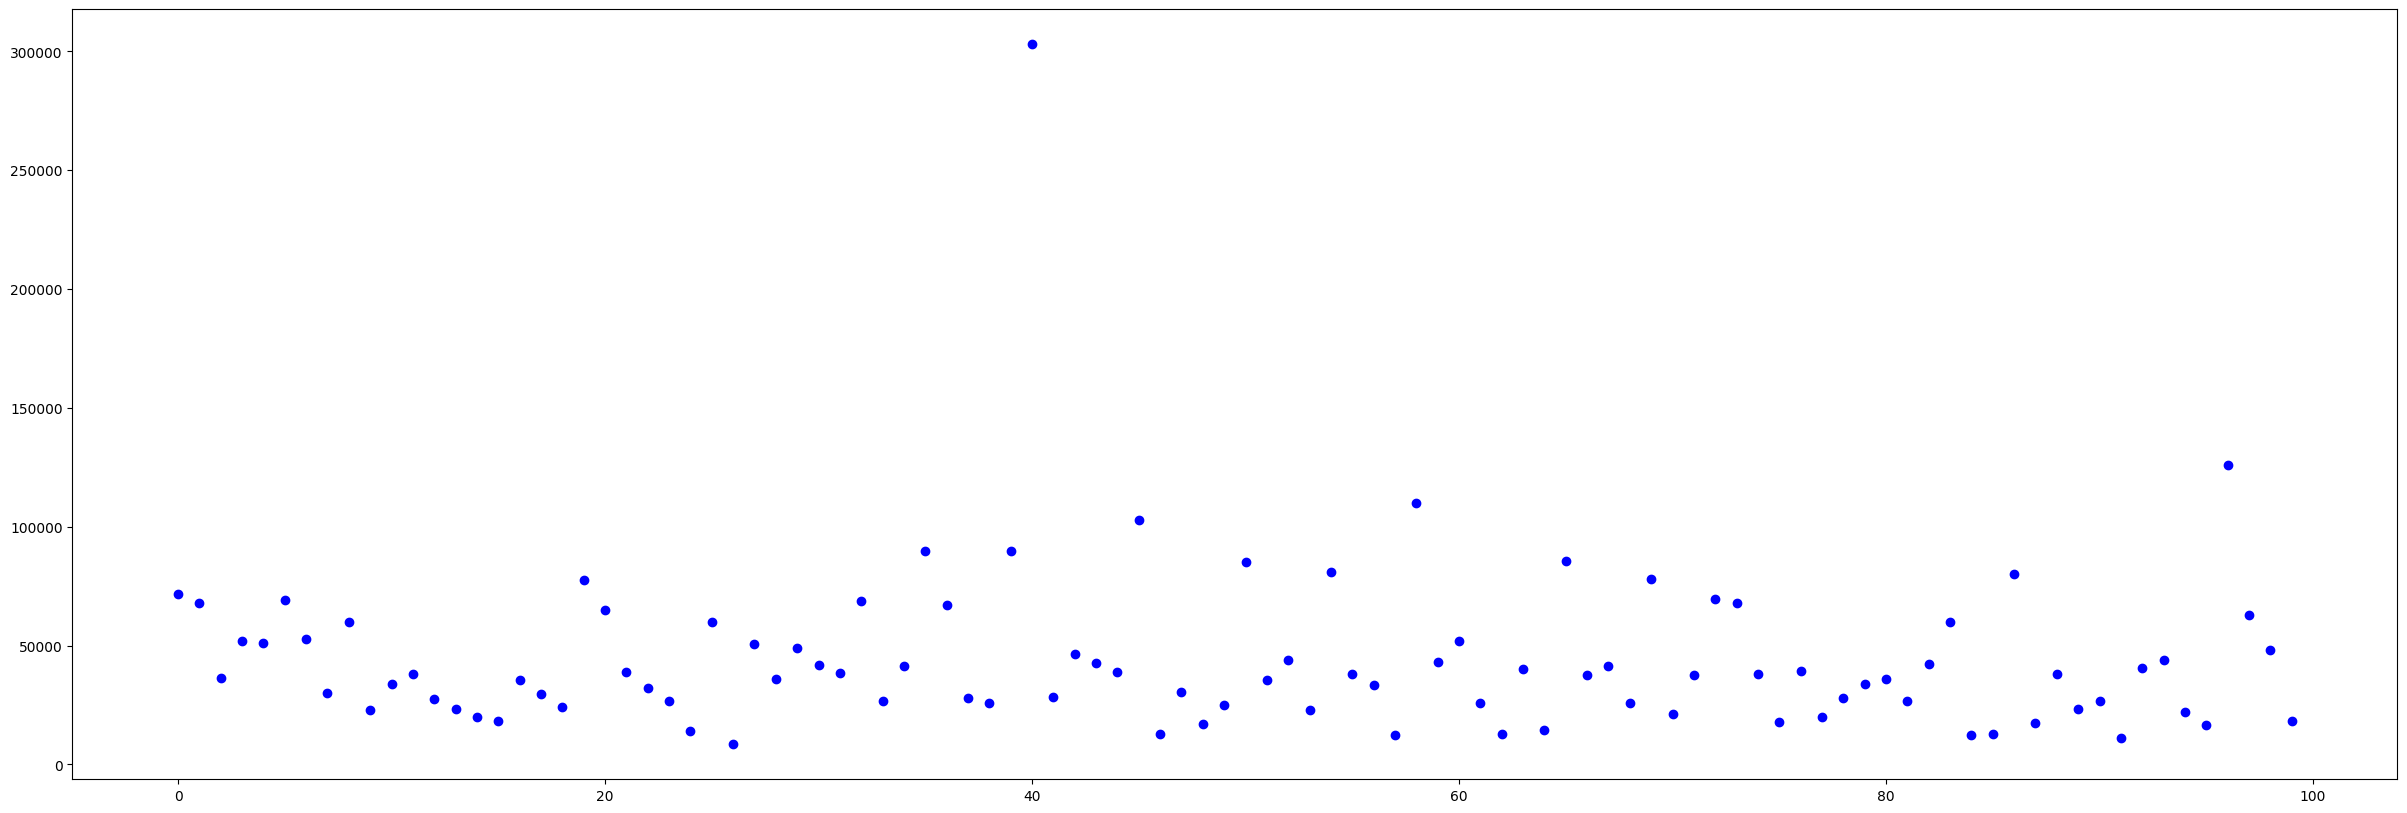

In [ ]:
plt.figure(figsize = (30, 10))
plt.plot(Y_test[0:100], 'bo', label = 'real')
plt.plot(pred[0:100], 'ro', label = 'RF_pred')
plt.plot(pred2[0:100], 'go', label = 'XGB_pred')
plt.ylabel('Price')
plt.legend()
plt.show()

# 학생 학업 성취도 데이터 세트 이용

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("xAPI-Edu-Data.csv")
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [ ]:
df.columns
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [ ]:
df.dtypes

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

In [ ]:
df.duplicated().any(), df.duplicated().sum()

(True, 2)

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().any(), df.duplicated().sum()

(False, 0)

In [ ]:
df.isnull().any(), df.isnull().sum()

(gender                      False
 NationalITy                 False
 PlaceofBirth                False
 StageID                     False
 GradeID                     False
 SectionID                   False
 Topic                       False
 Semester                    False
 Relation                    False
 raisedhands                 False
 VisITedResources            False
 AnnouncementsView           False
 Discussion                  False
 ParentAnsweringSurvey       False
 ParentschoolSatisfaction    False
 StudentAbsenceDays          False
 Class                       False
 dtype: bool,
 gender                      0
 NationalITy                 0
 PlaceofBirth                0
 StageID                     0
 GradeID                     0
 SectionID                   0
 Topic                       0
 Semester                    0
 Relation                    0
 raisedhands                 0
 VisITedResources            0
 AnnouncementsView           0
 Discussion        

In [ ]:
df.select_dtypes(include='object').nunique()

gender                       2
NationalITy                 14
PlaceofBirth                14
StageID                      3
GradeID                     10
SectionID                    3
Topic                       12
Semester                     2
Relation                     2
ParentAnsweringSurvey        2
ParentschoolSatisfaction     2
StudentAbsenceDays           2
Class                        3
dtype: int64

In [ ]:
for x in np.arange(0, len(df.select_dtypes(include='object').columns), 1) :
    print( df.select_dtypes(include='object').columns[x])
    print(df.select_dtypes(include='object')[df.select_dtypes(include='object').columns[x]].unique())

gender
['M' 'F']
NationalITy
['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']
PlaceofBirth
['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia']
StageID
['lowerlevel' 'MiddleSchool' 'HighSchool']
GradeID
['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']
SectionID
['A' 'B' 'C']
Topic
['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']
Semester
['F' 'S']
Relation
['Father' 'Mum']
ParentAnsweringSurvey
['Yes' 'No']
ParentschoolSatisfaction
['Good' 'Bad']
StudentAbsenceDays
['Under-7' 'Above-7']
Class
['M' 'L' 'H']


In [ ]:
for x in df.index :
    if df.loc[x, 'NationalITy'] == 'KW' :
        df.loc[x, 'NationalITy'] = 'Kuwait'
    elif df.loc[x, 'NationalITy'] == 'lebanon' :
        df.loc[x, 'NationalITy'] = 'Lebanon'

for x in df.index :
    if df.loc[x, 'PlaceofBirth'] == 'KuwaIT' :
        df.loc[x, 'PlaceofBirth'] = 'Kuwait'
    elif df.loc[x, 'PlaceofBirth'] == 'lebanon' :
        df.loc[x, 'PlaceofBirth'] = 'Lebanon'

for x in df.index :
    if df.loc[x, 'gender'] == 'M' :
        df.loc[x, 'gender'] = 'Male'
    elif df.loc[x, 'gender'] == 'F' :
        df.loc[x, 'gender'] = 'Female'

for x in df.index :
    if df.loc[x, 'Semester'] == 'F' :
        df.loc[x, 'Semester'] = 'First'
    elif df.loc[x, 'Semester'] == 'S' :
        df.loc[x, 'Semester'] = 'Second'

for x in df.index :
    if df.loc[x, 'Class'] == 'M' :
        df.loc[x, 'Class'] = 'Middle'
    elif df.loc[x, 'Class'] == 'L' :
        df.loc[x, 'Class'] = 'Low'
    elif df.loc[x, 'Class'] == 'H' :
        df.loc[x, 'Class'] = 'High'

In [ ]:
for x in np.arange(0, len(df.select_dtypes(include='object').columns), 1) :
    print( df.select_dtypes(include='object').columns[x])
    print(df.select_dtypes(include='object')[df.select_dtypes(include='object').columns[x]].unique())

gender
['Male' 'Female']
NationalITy
['Kuwait' 'Lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']
PlaceofBirth
['Kuwait' 'Lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia']
StageID
['lowerlevel' 'MiddleSchool' 'HighSchool']
GradeID
['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']
SectionID
['A' 'B' 'C']
Topic
['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']
Semester
['First' 'Second']
Relation
['Father' 'Mum']
ParentAnsweringSurvey
['Yes' 'No']
ParentschoolSatisfaction
['Good' 'Bad']
StudentAbsenceDays
['Under-7' 'Above-7']
Class
['Middle' 'Low' 'High']


In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

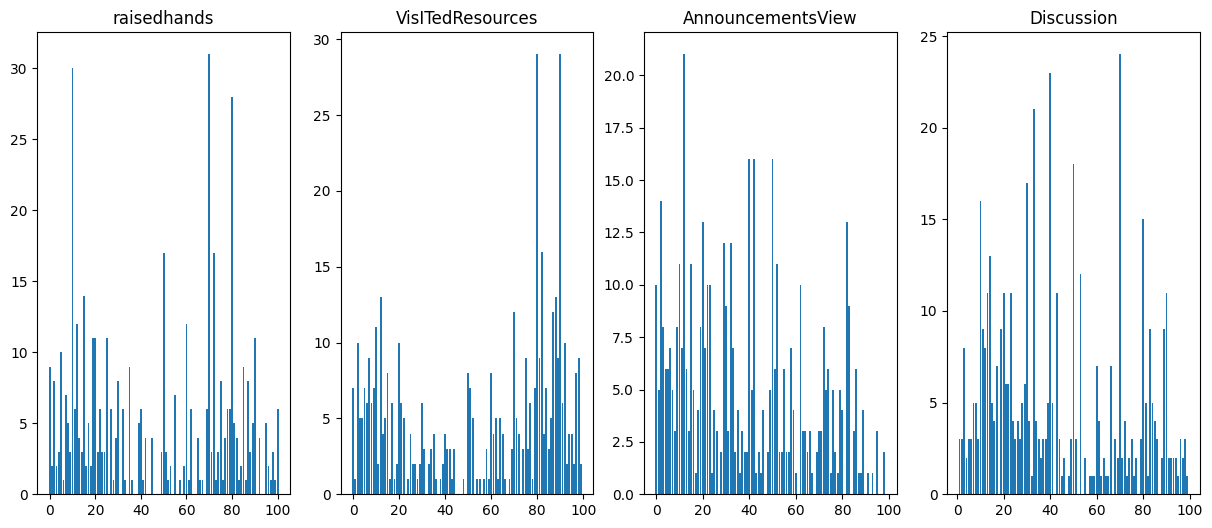

In [ ]:
plt.figure(figsize=(15, 6))

index = df.select_dtypes(exclude='object').columns

for i in range(len(index)):
    y = []
    x = np.unique(df.select_dtypes(exclude='object')[df.select_dtypes(exclude='object').columns[i]], return_counts=True)

    plt.subplot(1, 4, i+1)
    plt.bar(x[0],x[1])
    plt.title(index[i])

plt.show()

In [ ]:
fig = make_subplots(rows=1,cols=len(df.select_dtypes(exclude='object').columns),shared_yaxes=False)

for i in np.arange(0, len(df.select_dtypes(exclude='object').columns), 1) :
    fig.add_trace(go.Box(y=df.select_dtypes(exclude='object')[df.select_dtypes(exclude='object').columns[i]],name= df.select_dtypes(exclude='object').columns[i],boxpoints='suspectedoutliers'),row=1,col=i+1)

fig.show()

In [ ]:
px.scatter(data_frame=df,x='VisITedResources',y='raisedhands',trendline='ols',marginal_x='histogram',marginal_y='histogram',title='발표와 자료조사의 상관관')